In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\Dell Latitude
[nltk_data]     3410\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv("C:\\Users\\Dell Latitude 3410\\Downloads\\Dataset-SA.csv\\Dataset-SA.csv")

In [3]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [4]:
data.shape

(205052, 6)

In [5]:
#check the shape of the given dataset
print(f'The dataset has {data.shape[0]} number of rows and {data.shape[1]} number of columns.')

The dataset has 205052 number of rows and 6 number of columns.


In [6]:
#check the columns in dataset
data.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [7]:
#Check number of uniqueIds to see if there's any duplicate record in our dataset
data['product_name'].nunique()

958

In [8]:
# check the null values
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [9]:
data.isnull().any()


product_name     False
product_price    False
Rate             False
Review            True
Summary           True
Sentiment        False
dtype: bool

In [10]:
# drop the null values
data.dropna(inplace=True, axis=0)

In [11]:
data.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180379 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180379 non-null  object
 1   product_price  180379 non-null  object
 2   Rate           180379 non-null  object
 3   Review         180379 non-null  object
 4   Summary        180379 non-null  object
 5   Sentiment      180379 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [13]:
# The product price and rate are in obeject  we need to change it into int type. Before that we need to remove the unwanted values that are in  the product price attribute
data= data[(data.Rate !='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)') & (data.Rate != "Bajaj DX 2 L/W Dry Iron") & (data.Rate !='Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')]

In [14]:
# Replace NaN values with 0
data['product_price'].fillna(0, inplace=True)

# Convert to integer
data['product_price'] = data['product_price'].astype(int)

In [15]:
# Replace NaN values with 0
data['Rate'].fillna(0, inplace=True)

# Convert to integer
data['Rate'] = data['Rate'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180376 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180376 non-null  object
 1   product_price  180376 non-null  int32 
 2   Rate           180376 non-null  int32 
 3   Review         180376 non-null  object
 4   Summary        180376 non-null  object
 5   Sentiment      180376 non-null  object
dtypes: int32(2), object(4)
memory usage: 8.3+ MB


In [17]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (180376, 6)


In [18]:
#Creating a new column 'length' that will contain the length of the string in 'reviews' column

data['length'] = data['Review'].apply(len)

In [19]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,length
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,6
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,7
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,4
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,15
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,4


In [20]:
#Randomly checking for 10th record
print(f"'Reviews' column value: {data.iloc[10]['Review']}") #Original value
print(f"Length of review : {len(data.iloc[10]['Review'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'Reviews' column value: great product
Length of review : 13
'length' column value : 13


In [21]:
data['Review'] = data['Review'].apply(lambda x: x.lower())
data['Review'] = data['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [22]:
data['Review']

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205047           must buy
205048              super
205049               nice
205050           just wow
205051      valueformoney
Name: Review, Length: 180376, dtype: object

In [23]:
#check first three reviews
for review in data['Review'][0:10]:
    print(review,'\n')

super 

awesome 

fair 

useless product 

fair 

awesome 

highly recommended 

nice 

unsatisfactory 

worth the money 



In [24]:
data['Rate'].value_counts()

Rate
5    105641
4     36966
1     18294
3     14024
2      5451
Name: count, dtype: int64

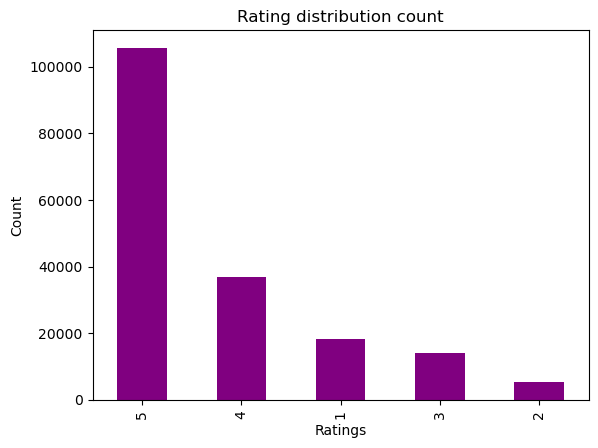

In [25]:
#Bar plot to visualize the total counts of each rating

data['Rate'].value_counts().plot.bar(color = 'purple')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [26]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['Rate'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
Rate
5    58.57
4    20.49
1    10.14
3     7.77
2     3.02
Name: count, dtype: float64


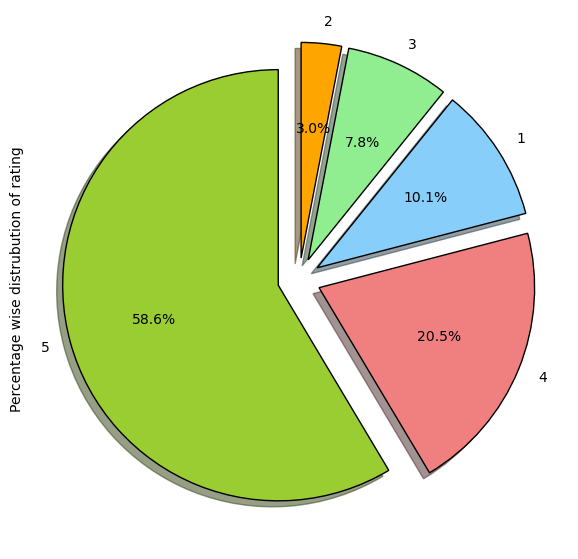

In [27]:
fig = plt.figure(figsize=(7,7))

colors = ('yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['Rate'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


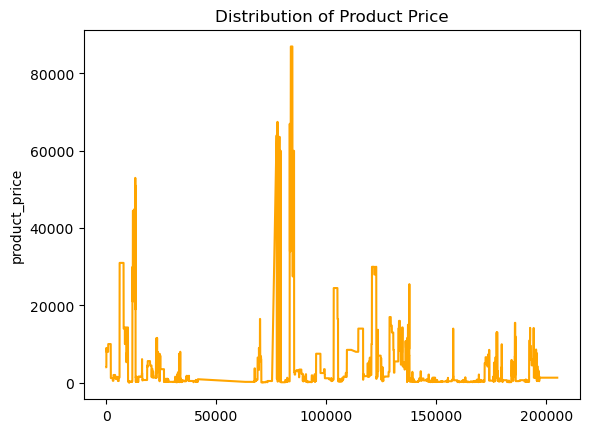

In [28]:
# Explore the distribution of numerical variables
sns.lineplot(data['product_price'],color='orange')
plt.title('Distribution of Product Price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


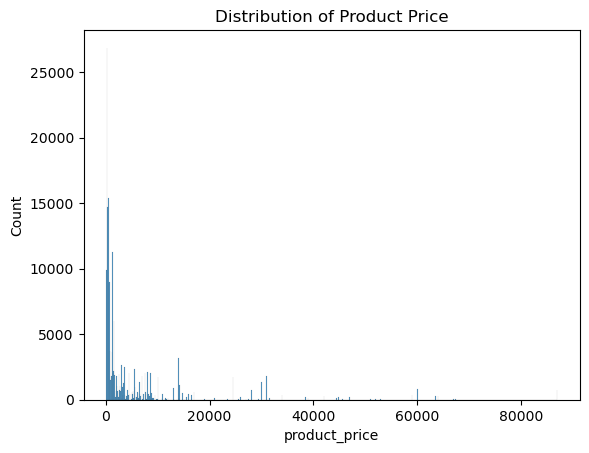

In [29]:
# Explore the distribution of numerical variables
sns.histplot(data['product_price'])
plt.title('Distribution of Product Price')
plt.show()

In [30]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Load the dataset
#dataset = pd.read_csv("your_dataset.csv")

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Tokenize the text data
tokenized_texts = []

for index, row in data.iterrows():
    text = row['Review']  # Assuming 'Summary' column contains the text data for sentiment analysis
    tokens = word_tokenize(text)
    tokenized_texts.append(tokens)

# Print the tokenized texts
for i, tokens in enumerate(tokenized_texts[:10]):  # Print first 10 tokenized texts for demonstration
    print(f"Tokens for row {i+1}: {tokens}")


[nltk_data] Downloading package punkt to C:\Users\Dell Latitude
[nltk_data]     3410\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokens for row 1: ['super']
Tokens for row 2: ['awesome']
Tokens for row 3: ['fair']
Tokens for row 4: ['useless', 'product']
Tokens for row 5: ['fair']
Tokens for row 6: ['awesome']
Tokens for row 7: ['highly', 'recommended']
Tokens for row 8: ['nice']
Tokens for row 9: ['unsatisfactory']
Tokens for row 10: ['worth', 'the', 'money']


In [31]:
#Distinct values of 'Sentiment' and its count 

print(f"Sentiment value count: \n{data['Sentiment'].value_counts()}")

Sentiment value count: 
Sentiment
positive    147169
negative     24400
neutral       8807
Name: count, dtype: int64


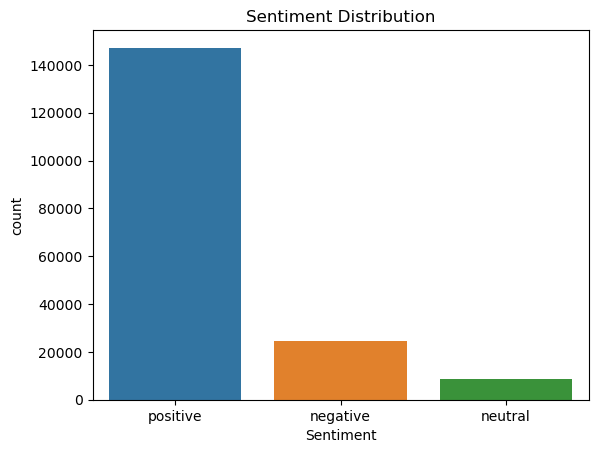

In [32]:
# Visualize the distribution of sentiment
sns.countplot(data=data, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [33]:
#Extracting the 'Reviews' value for one record with feedback = 0
review_0 = data[data['Sentiment'] == 'negative'].iloc[1]['Review']
print(review_0)

unsatisfactory


In [34]:
#Extracting the 'Reviews' value for one record with feedback = 1
review_1 = data[data['Sentiment'] == 'positive'].iloc[1]['Review']
print(review_1)

awesome


In [35]:
#Extracting the 'Reviews' value for one record with feedback = 1
review_2 = data[data['Sentiment'] == 'neutral'].iloc[1]['Review']
print(review_2)

worst experience ever


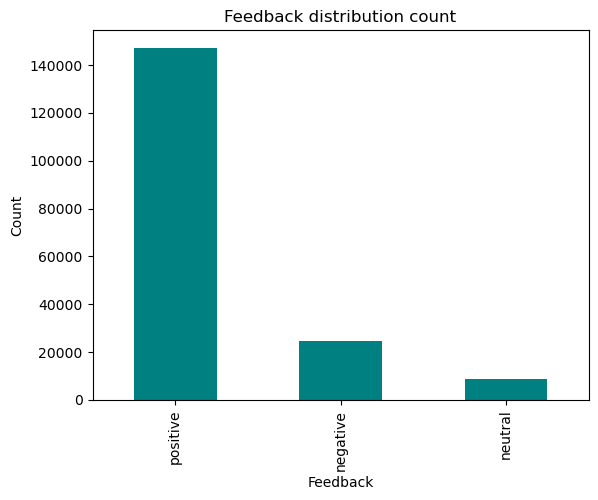

In [36]:
#Bar graph to visualize the total counts of each feedback
data['Sentiment'].value_counts().plot.bar(color = 'teal')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [37]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Sentiment value count - percentage distribution: \n{round(data['Sentiment'].value_counts()/data.shape[0]*100,2)}")

Sentiment value count - percentage distribution: 
Sentiment
positive    81.59
negative    13.53
neutral      4.88
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

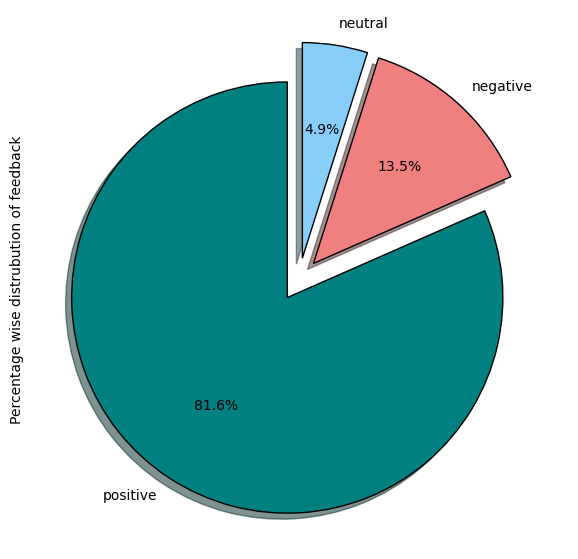

In [38]:
fig = plt.figure(figsize=(7,7))

colors = ('teal', 'lightcoral', 'lightskyblue')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['Sentiment'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')


In [39]:
#Feedback = 0
data[data['Sentiment'] == "negative"]['Rate'].value_counts()

Rate
1    16156
2     3977
3     2646
4      836
5      785
Name: count, dtype: int64

In [40]:
#Feedback = 1
data[data['Sentiment'] == 'positive']['Rate'].value_counts()

Rate
5    102820
4     34364
3      8255
1      1109
2       621
Name: count, dtype: int64

In [41]:
#Feedback = 2
data[data['Sentiment'] == 'neutral']['Rate'].value_counts()

Rate
3    3123
5    2036
4    1766
1    1029
2     853
Name: count, dtype: int64

In [42]:
#Distinct values of 'product' and its count 
print(f"Product value count: \n{data['product_name'].value_counts()}")

Product value count: 
product_name
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)                                                               6005
Lakm?? Eyeconic Kajal Twin Pack??????????(Deep Black, 0.7 g)                                                                                                                              5000
Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)                                                                                                         2205
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set 18 Pieces Dinner SetWhite Microwave Safe                                                                           2095
Home Sizzler 153 cm 502 ft Polyester Room Darkening Window Curtain Pack Of 2Floral Brown                                                                                                  2012
          

In [43]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['product_name'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
product_name
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)                                                               3.33
Lakm?? Eyeconic Kajal Twin Pack??????????(Deep Black, 0.7 g)                                                                                                                              2.77
Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)                                                                                                         1.22
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set 18 Pieces Dinner SetWhite Microwave Safe                                                                           1.16
Home Sizzler 153 cm 502 ft Polyester Room Darkening Window Curtain Pack Of 2Floral Brown                                                                                     

In [44]:
data.describe()

,product_price,Rate,length
count,180376.000000,180376.000000,180376.000000
mean,4620.764104,4.143218,12.619046
std,10439.043652,1.294833,4.983144
min,59.000000,1.000000,2.000000
25%,350.000000,4.000000,9.000000
50%,980.000000,5.000000,12.000000
75%,3569.000000,5.000000,16.000000
max,86990.000000,5.000000,140.000000


In [45]:
data.groupby('product_name')['Rate'].mean()

product_name
1170BLBR Unique New Day  Date Analog Watch   For Men                                                                                                                                                            3.986667
38024PP25 Minimalists Analog Watch   For Men                                                                                                                                                                    4.888889
3D METRO SUPER STORE JUICERGduumy 1 Juicer1 Handle1 Jar1 Glass 0 Juicer 1 Jar Green                                                                                                                             3.670000
3D METRO SUPER STORE METROMIXER Pro 0 Juicer 1 Jar Multicolor                                                                                                                                                   4.750000
77085PP03 Volt Analog Watch   For Men                                                                                  

In [46]:
data['length'].describe()

count    180376.000000
mean         12.619046
std           4.983144
min           2.000000
25%           9.000000
50%          12.000000
75%          16.000000
max         140.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

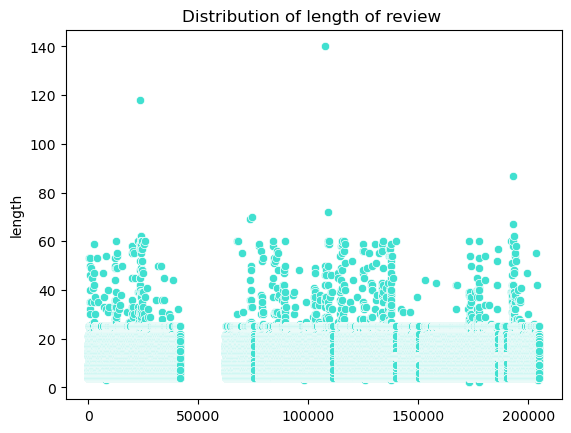

In [47]:
sns.scatterplot(data['length'],color='turquoise').set(title='Distribution of length of review ')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of length of review ')]

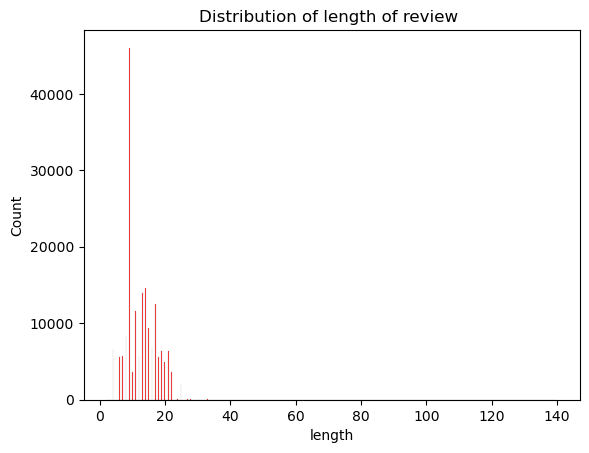

In [48]:
sns.histplot(data['length'],color='red').set(title='Distribution of length of review ')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of length of review if Sentiment = negative')]

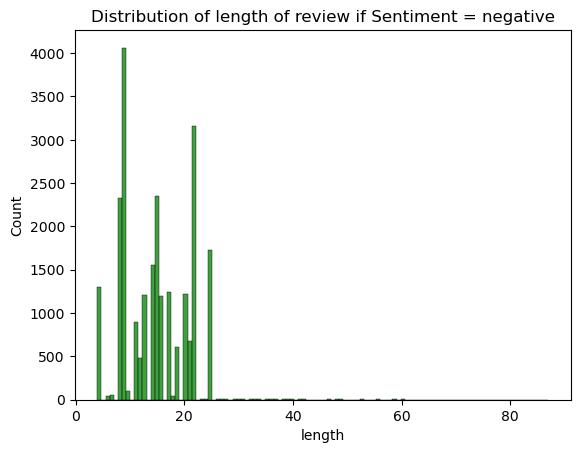

In [49]:
sns.histplot(data[data['Sentiment']=="negative"]['length'],color='green').set(title='Distribution of length of review if Sentiment = negative')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of length of review if feedback = positive')]

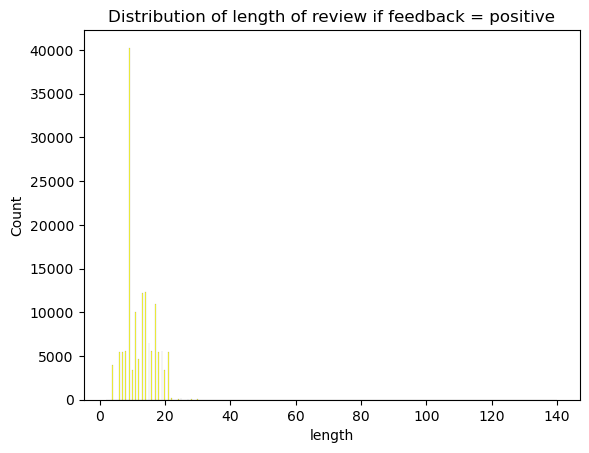

In [50]:
sns.histplot(data[data['Sentiment']=="positive"]['length'],color='yellow').set(title='Distribution of length of review if feedback = positive')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of length of review if feedback = neutral')]

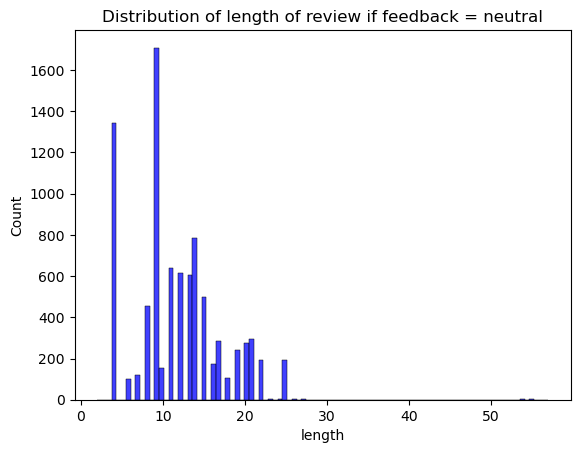

In [51]:
sns.histplot(data[data['Sentiment']=="neutral"]['length'],color='blue').set(title='Distribution of length of review if feedback = neutral')

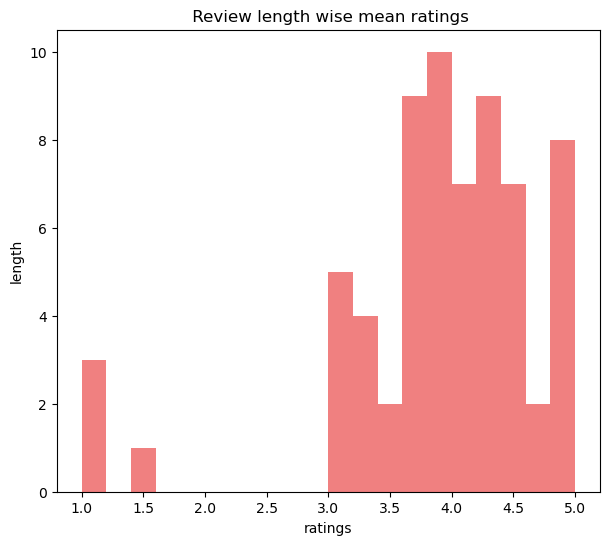

In [52]:
data.groupby('length')['Rate'].mean().plot.hist(color = 'lightcoral', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [53]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.Review)

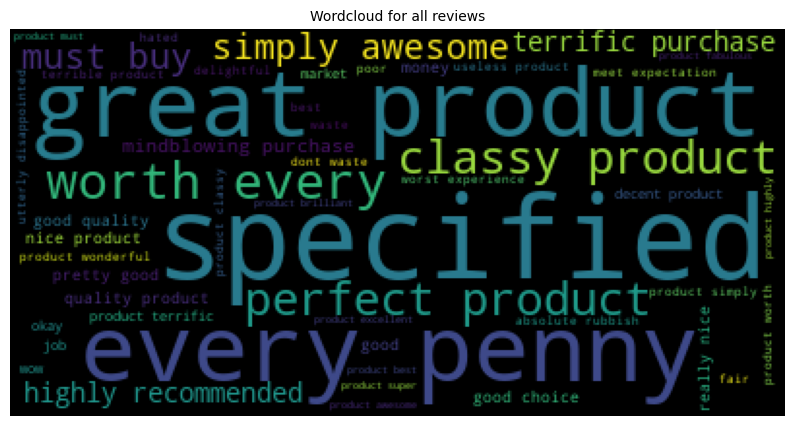

In [54]:
# Combine all reviews
reviews = " ".join([review for review in data['Review']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='black', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [55]:
# Combine all reviews for each sentiment category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['Sentiment'] == "negative"]['Review']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['Sentiment'] == "positive"]['Review']])
pos_reviews = pos_reviews.lower().split()

neu_reviews = " ".join([review for review in data[data['Sentiment'] == "neutral"]['Review']])
neu_reviews = neu_reviews.lower().split()
#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

unique_neutral = [x for x in neu_reviews if x not in pos_reviews and x not in neg_reviews]
unique_neutral = " ".join(unique_neutral)



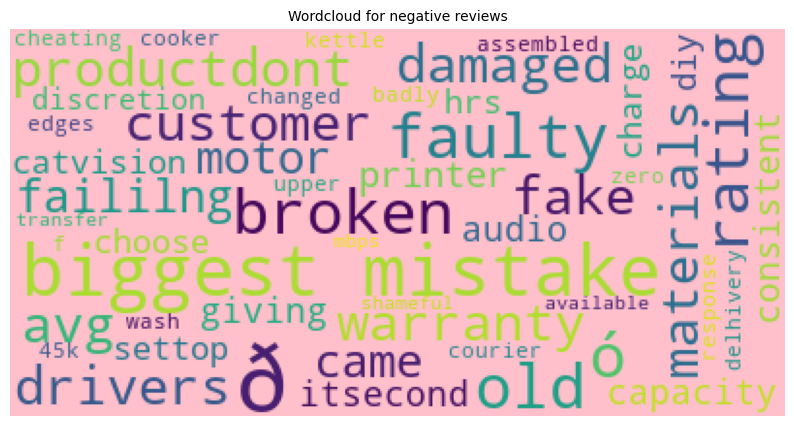

In [56]:
wc = WordCloud(background_color='pink', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

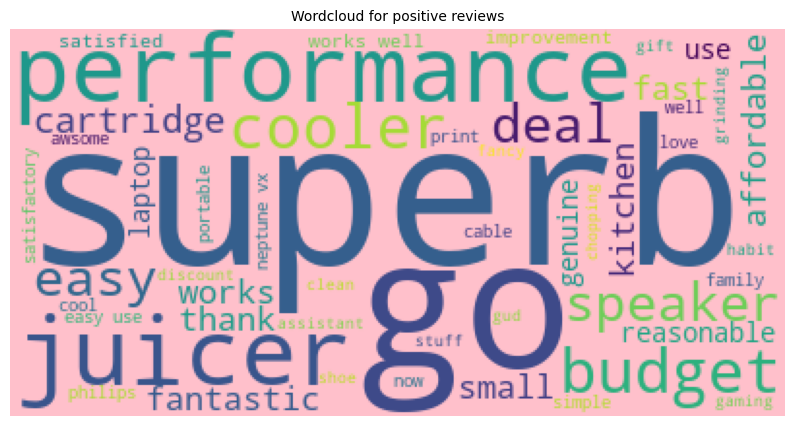

In [57]:
wc = WordCloud(background_color='pink', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

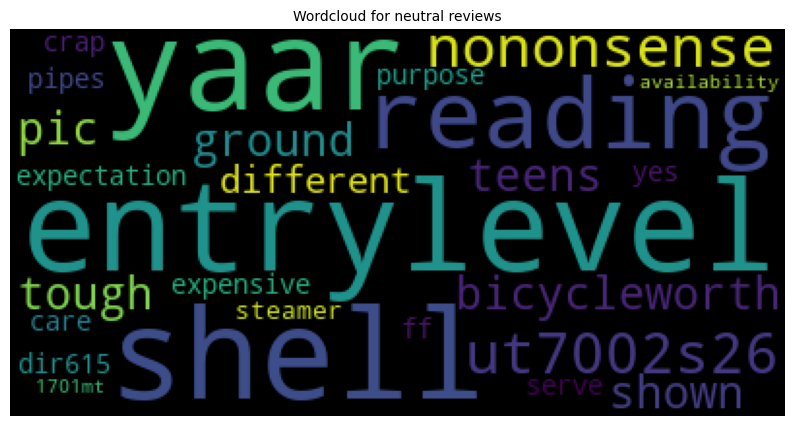

In [58]:
wc = WordCloud(background_color='black', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neutral))
plt.title('Wordcloud for neutral reviews', fontsize=10)
plt.axis('off')
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing - Converting categorical labels to numerical labels
data['Sentiment'] = data['Sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment'], test_size=0.2, random_state=42)

# Text vectorization (converting text data into numerical feature vectors)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Model training (using Random Forest classifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_counts, y_train)

# Predictions on training data
train_predictions = clf.predict(X_train_counts)

# Predictions on test data
test_predictions = clf.predict(X_test_counts)

# Model evaluation
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_predictions))



Training Accuracy: 0.9143243243243243
Testing Accuracy: 0.9112429315888679

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4904
           1       0.92      0.99      0.95     29396
           2       0.50      0.00      0.00      1776

    accuracy                           0.91     36076
   macro avg       0.76      0.59      0.59     36076
weighted avg       0.89      0.91      0.89     36076



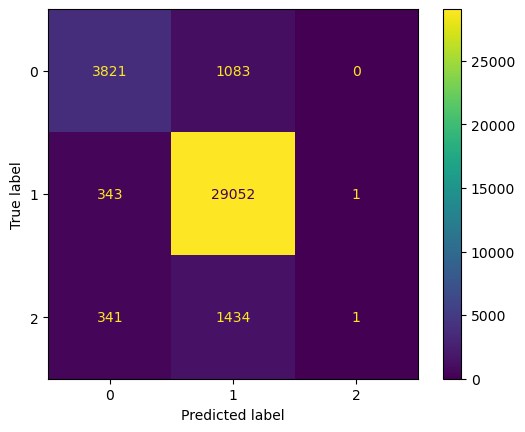

In [60]:
# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
cm_display.plot()
plt.show()

In [61]:

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'])

print("Confusion Matrix (Test Data):")
print(conf_matrix_df)


Confusion Matrix (Test Data):
                 Predicted Negative  Predicted Neutral  Predicted Positive
Actual Negative                3821               1083                   0
Actual Neutral                  343              29052                   1
Actual Positive                 341               1434                   1
